In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import datetime,os,warnings,csv

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Input,Dense,LSTM,advanced_activations,Dropout,BatchNormalization,concatenate,Embedding

from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

import pickle

sns.set()
warnings.filterwarnings('ignore')

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
df_train = pd.read_csv('..\\..\\TF_data\\KEPLER\\exoTrain.csv',infer_datetime_format=True)
df_test = pd.read_csv('..\\..\\TF_data\\KEPLER\\exoTest.csv',infer_datetime_format=True)

DATA_train = pickle.load(open('..\\..\\TF_data\\KEPLER\\DATA_train.p','rb'))
LABELS_train = pickle.load(open('..\\..\\TF_data\\KEPLER\\LABELS_train.p','rb'))

DATA_test = pickle.load(open('..\\..\\TF_data\\KEPLER\\DATA_test.p','rb'))
LABELS_test = pickle.load(open('..\\..\\TF_data\\KEPLER\\LABELS_test.p','rb'))

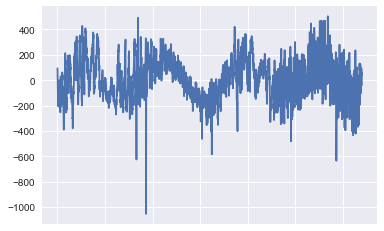

In [3]:
# Label 1: No exo-planet
# Label 2: Exo-planet

df_train.drop(['LABEL'],axis=1).loc[0].plot()

Text(0.5,1,'1')

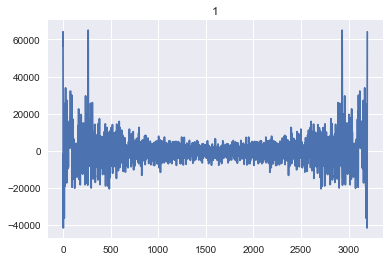

In [5]:
ID = 549

plt.plot(DATA_train[ID,:])
plt.title(str(LABELS_train[ID]))

In [11]:
LABELS_train -= 1
LABELS_test -= 1

In [19]:
RFC = RandomForestClassifier()
RFC.fit(df_train.drop(['LABEL'],axis=1).values,LABELS_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
RFC.score(df_test.drop(['LABEL'],axis=1).values,LABELS_test)

0.9350877192982456

In [21]:
df_test

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1        2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2        2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3        2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4        2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
5        1    14.28    10.63    14.56    12.42    12.07    12.92    12.27   
6        1  -150.48  -141.72  -157.60  -184.60  -164.89  -173.87  -162.91   
7        1   -10.06   -12.78   -13.16    -9.81   -18.91   -20.33   -22.85   
8        1   454.66   440.60   382.29   361.63   298.63   253.29   155.86   
9        1   187.40   209.60   199.91   179.62   171.21   161.84   163.02   
10       1   205.07   177.98   163.41   159.70   157.71   167.57   191.28   
11       1   335.74   330.21   290.66   274.18   271.24   176.42   176.75   
12       1    -8.79     0.04     0.66    -2.63     4.42    -2.95   -12.17   
13       1   449.16   419.78   357.45   355.95   284.41   251.74   192.79   
14       1   154.58   127.27   128.86   122.53    94.81    78.94    76.19   
15       1    -9.18    -9.43   -11.42    -8.89    -3.48   -13.66    -8.87   
16       1    53.85    24.78    67.64    46.14    23.64    30.49    31.21   
17       1     3.12    -2.32     1.33    -9.67    -5.07   -11.99   -10.96   
18       1   -14.46    -9.69    -9.28    -7.35   -12.49     2.22    -4.37   
19       1  -109.52   -85.90   -87.96   -75.35   -74.37   -61.36   -46.22   
20       1   -20.51   -15.64   -18.75   -16.94   -12.53   -16.99    -5.61   
21       1    96.82   290.25   326.25   159.44  -290.12  -434.44  -484.44   
22       1   -26.81   -26.63   -20.35   -15.88   -11.87    -8.38   -12.34   
23       1   -50.43   -35.58   -38.34   -32.80   -31.34   -28.10   -13.27   
24       1    44.86    35.32    43.92    30.30    33.94    37.29    29.40   
25       1  -292.38  -301.52  -254.85  -225.36  -198.58  -179.63  -105.21   
26       1   -26.55   -26.30   -25.82   -20.87   -19.52   -19.03   -16.85   
27       1   -15.30   -19.60   309.24   -12.80   -30.55   -39.73   -27.00   
28       1   393.72   341.55   277.91   290.79   292.41   240.35   238.60   
29       1     1.61     5.61    10.82     6.89    18.92    11.98    15.61   
..     ...      ...      ...      ...      ...      ...      ...      ...   
540      1   -36.60   -37.05   -34.04   -28.38   -28.97   -14.95    -8.57   
541      1   -14.73   -15.41   -20.70   -11.79   -21.02   -13.02   -23.65   
542      1    -2.97    -6.77    -1.34     1.48    -3.15   -10.13    -6.30   
543      1    26.91    26.45    21.49    13.68     4.88     1.38    -3.46   
544      1  -325.64  -288.90  -294.61  -239.74  -249.20  -255.00  -204.75   
545      1    89.59    99.61    89.61     5.90    -0.63   -14.94   -21.08   
546      1     0.75    -2.66    -1.13    -2.28    -2.68     1.37    -7.84   
547      1   -74.21   -74.48   -71.44   -69.82   -69.00   -69.19   -79.74   
548      1   -18.84   -22.89   -25.22   -28.98   -23.47   -25.78   -25.69   
549      1  -144.94  -170.06  -267.94  -259.22  -411.66  -504.90  -483.90   
550      1    14.39    18.66   -22.31   -10.56   -46.84   -25.10   -26.65   
551      1   -41.94   -18.78   -29.02   -25.69   -28.45   -18.45   -20.89   
552      1    56.94    33.87    39.16    16.73    12.19    19.30     9.81   
553      1   259.94   263.86   186.72   187.85   102.53    42.02     7.35   
554      1    12.92    14.56    23.61     3.55     5.69     8.04    -2.16   
555      1    33.53    44.91    18.05    52.09    40.84     2.06    24.85   
556      1   -12.32    -7.44   -10.58   -14.98   -15.68    -1.86    -0.69   
557      1   -16.57   -12.59    -8.73   -12.60   -12.89   -18.10   -18.18   
558      1    53.91    46.59    50.30    32.19    48.64   -21.02     5.50   
559      1    -6.30    -2.86     0.95    -6.69    -2.61    -4.65    -7.27   
5